🔴PROBLEM STATEMENT

A supermarket has several outlets or several stores around the world & they want us to predict the sales.

🔴 Importing Libraries

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

🔴Data Loading

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Big Mart Sales.csv")

In [23]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
df.shape

(8523, 12)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [26]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


🔴Finding out the missing values

In [27]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

🔴Replacing or dealing with the missing values

In [28]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

All our missing values are imputed so now we're good to go.

🔴Analyze the data

In [29]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


🔴Data Visualization

In [30]:
sns.set()

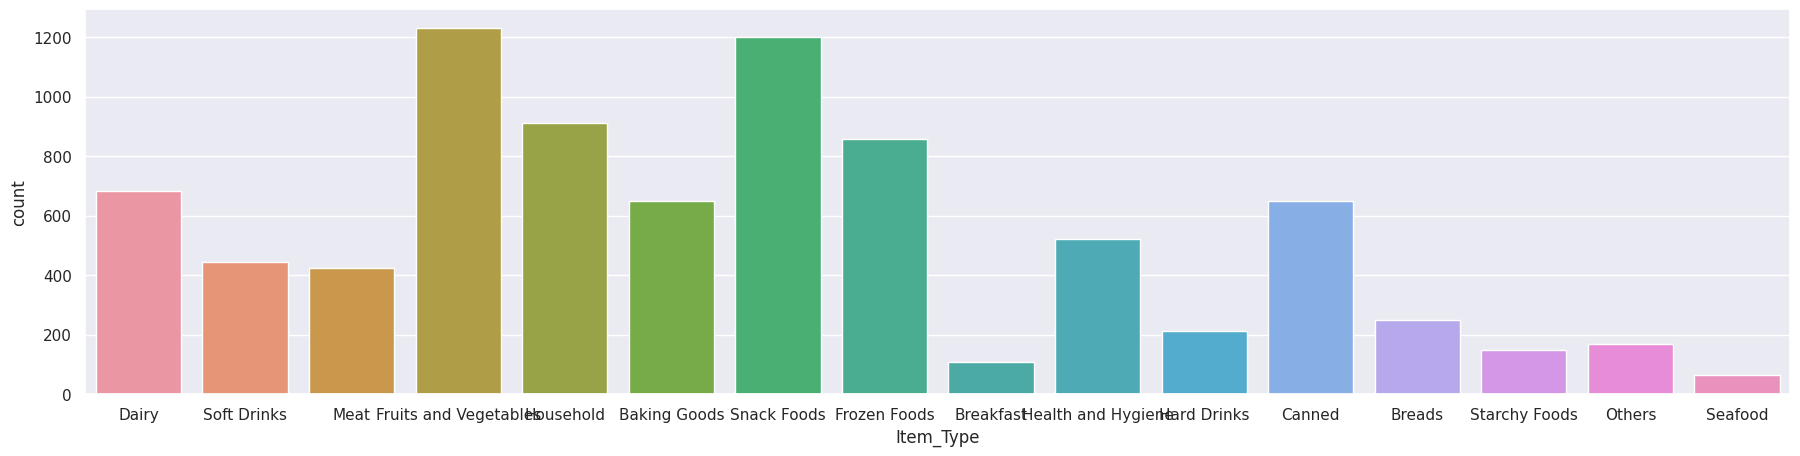

In [32]:
plt.figure(figsize=(22,5))
sns.countplot(x='Item_Type',data=df)
plt.show()

From the illustration above, we can tell items like fruits and vegetables, household goods, snacks, starchy foods and seafood are more sold than the other items so the mall should consider keeping more of these items in inventory, give special offers and discounts to these goods so volume of sales increases more.

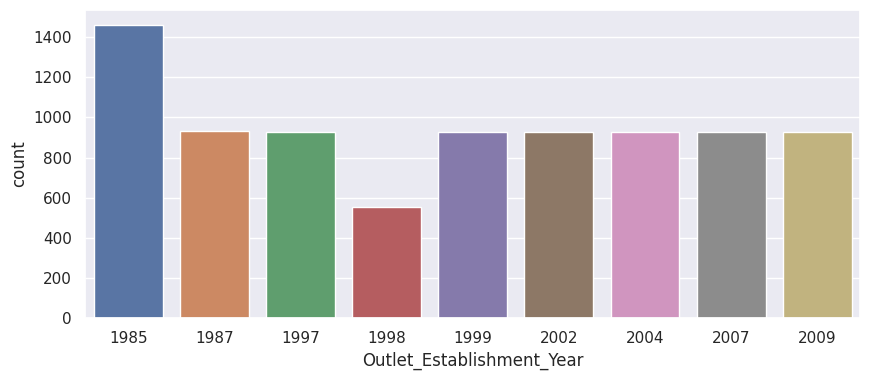

In [36]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Establishment_Year',data=df)
plt.show()

Interestingly, 1985, the debut year of the mall had the highest sales but from then on, sales volume was pretty much constant.

Therefore these are the years on which different outlets or different stores have been established

<Axes: xlabel='Outlet_Type', ylabel='count'>

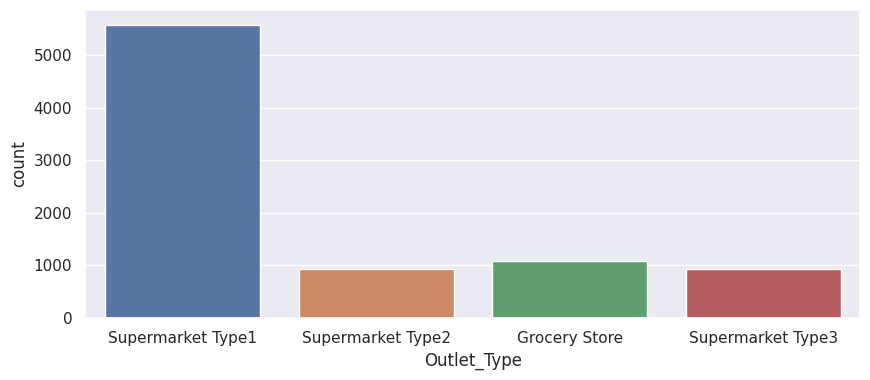

In [38]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type',data=df)

Supermarket Type1 have the most sales, much higher than other types so the mall owners should consider building more of these types in other locations.

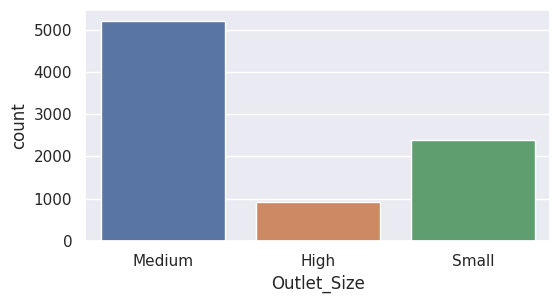

In [40]:
plt.figure(figsize=(6,3))
sns.countplot(x='Outlet_Size',data=df)
plt.show()

From the above graph, we can observe that we have three outlet_Size in this case which is medium, small & high

🔴Data Preprocessing

In [41]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

🔴Low Fat, LF and low fat are all same and Regular and reg are same so we need to combine them.

In [42]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

🔴LABEL ENCODING

Now we'll do label encoding to transform categorical values to numerical values.

In [43]:
encoder = LabelEncoder()
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


🔴Data Spliting

In [44]:
x = df.drop(columns='Item_Outlet_Sales',axis=1)
y = df['Item_Outlet_Sales']

🔴SPLITTING THE DATA INTO TRAINING DATA & TESTING DATA

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [47]:
print(x.shape,x_train.shape,x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


🔴Training the model and Prediction of Data.

 We're going to build a LinearRegression model and XGBoost model and compare. Finally, we will use the one with higher accuracy.

In [49]:
XGB_model = XGBRegressor()
XGB_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(x_train,y_train)

LinearRegression()

In [52]:
train_XGB_pred = XGB_model.predict(x_train)
train_XGB_pred

array([1974.8087, 2837.7822, 3312.695 , ..., 3171.7903, 1800.5138,
       2410.2485], dtype=float32)

In [53]:
train_LR_pred = LR_model.predict(x_train)
train_LR_pred

array([2327.41867944, 3031.89278067, 3867.31973582, ..., 2567.89841379,
       2376.92087115, 3052.32198326])

In [55]:
test_XGB_pred = XGB_model.predict(x_test)
test_XGB_pred

array([2130.7969, 2401.021 , 1764.3038, ..., 2327.3347, 2895.1543,
       3684.507 ], dtype=float32)

In [56]:
test_LR_pred = LR_model.predict(x_test)
test_LR_pred

array([2521.30878303, 3777.79279852, 1314.26315325, ..., 2255.36856828,
       4513.18525798, 3595.71438136])

In [54]:
#For XGBRegressor
XGB_RSValue = metrics.r2_score(y_train,train_XGB_pred)
print('R squared value for XGB Regressor:',XGB_RSValue)

R squared value for XGB Regressor: 0.8759287778441955


In [57]:
XGB_RSValue = metrics.r2_score(y_test,test_XGB_pred)
print('R squared value for XGB Regressor:',XGB_RSValue)

R squared value for XGB Regressor: 0.5060117482714839


In [59]:
#For Linear Regression
LR_RSValue = metrics.r2_score(y_train,train_LR_pred)
print('R squared value for Linear Regression:',LR_RSValue)

R squared value for Linear Regression: 0.514058329918831


In [60]:
LR_RSValue = metrics.r2_score(y_test,test_LR_pred)
print('R squared value for Linear Regression:',LR_RSValue)

R squared value for Linear Regression: 0.49498230467978976


Clearly, linear regressor is a better model for our project as it's R squared error is closer to 0. But we can still check with other models to find the best model.

Thus we have built the model to predict the sales & have performed the evaluation successfully